<a href="https://colab.research.google.com/github/rop2000/Stock-Short-Data-Analysis-Script/blob/main/Short_Data_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Short Data Notebook

###Data from 
> [Nasdaq Short Data](https://www.nasdaqtrader.com/Trader.aspx?id=shortsale)

> [FINRA Short Data](http://regsho.finra.org/regsho-Index.html)


In [141]:
#Set globals for stonks

STOCK = 'AAPL' # This is the only one that should be modified
UNFORMATTED_DATES = []
DATES = []
PSX_DATES = []
BX_SHORT_VALS = []
PSX_SHORT_VALS = []
FINRA_SHORT_VALS = []

In [142]:
%cd '/content'
!mkdir 'BX Data'
!mkdir 'PSX Data'
%cd 'BX Data'

/content
mkdir: cannot create directory ‘BX Data’: File exists
/content/BX Data


In [143]:
import ftplib
import os
import datetime


FTP_HOST = "ftp.nasdaqtrader.com"

FTP_USER = "Anonymous"

FTP_PASS = "guest"

In [144]:
# some utility functions
def get_size_format(n, suffix="B"):
    # converts bytes to scaled format (e.g KB, MB, etc.)
    for unit in ["", "K", "M", "G", "T", "P"]:
        if n < 1024:
            return f"{n:.2f}{unit}{suffix}"
        n /= 1024

def get_datetime_format(date_time):
    # convert to datetime object
    date_time = datetime.strptime(date_time, "%Y%m%d%H%M%S")
    # convert to human readable date time string
    return date_time.strftime("%Y/%m/%d %H:%M:%S")

In [145]:
# connect to the FTP server
ftp = ftplib.FTP(FTP_HOST, FTP_USER, FTP_PASS)
# force UTF-8 encoding
ftp.encoding = "utf-8"

In [146]:
# print the welcome message - 220 means client is ready and connected
print(ftp.getwelcome())

220 Microsoft FTP Service


In [147]:
ftp.cwd("files/shortsaledata/daily")

'250 CWD command successful.'

In [148]:
def parse_dir_line(line):
        words = line.split()
        filename = words[8]
        size = int(words[4])
        t = words[7].split(':')
        ts = words[5] + '-' + words[6] + '-' + datetime.datetime.now().strftime('%Y') + ' ' + t[0] + ':' + t[1]
        timestamp = datetime.datetime.strptime(ts, '%b-%d-%Y %H:%M')

In [149]:
# LIST a directory
print("*"*50, "LIST", "*"*50)
dir_list = []
ftp.dir(dir_list.append)
print(dir_list)
for line in dir_list:
   print(line[29:].strip().split(' '))

************************************************** LIST **************************************************
['02-12-21  04:31PM       <DIR>          bx', '09-06-12  12:18PM       <DIR>          nasdaq', '02-12-21  04:30PM       <DIR>          psx']
['bx']
['nasdaq']
['psx']


In [150]:
ftp.cwd("bx")
os.chdir('/content/BX Data')
!pwd

/content/BX Data


In [151]:
# # LIST a directory
# print("*"*50, "LIST", "*"*50)
# bx_file_list = []
# final_files = []
# ftp.dir(bx_file_list.append)
# print(bx_file_list)
# for line in bx_file_list:
#    final_files.append(line[29:].strip().split(' ')[1])
# print(final_files)

In [152]:
# https://stackoverflow.com/questions/11573817/how-to-download-a-file-via-ftp-with-python-ftplib
bx_filenames = ftp.nlst()
bx_filenames = bx_filenames[-100:] #Most recent 100 days (past 100 days)
print(bx_filenames)


['NQBXshvol20200922.txt', 'NQBXshvol20200923.txt', 'NQBXshvol20200924.txt', 'NQBXshvol20200925.txt', 'NQBXshvol20200928.txt', 'NQBXshvol20200929.txt', 'NQBXshvol20200930.txt', 'NQBXshvol20201001.txt', 'NQBXshvol20201002.txt', 'NQBXshvol20201005.txt', 'NQBXshvol20201006.txt', 'NQBXshvol20201007.txt', 'NQBXshvol20201008.txt', 'NQBXshvol20201009.txt', 'NQBXshvol20201012.txt', 'NQBXshvol20201013.txt', 'NQBXshvol20201014.txt', 'NQBXshvol20201015.txt', 'NQBXshvol20201016.txt', 'NQBXshvol20201019.txt', 'NQBXshvol20201020.txt', 'NQBXshvol20201021.txt', 'NQBXshvol20201022.txt', 'NQBXshvol20201023.txt', 'NQBXshvol20201026.txt', 'NQBXshvol20201027.txt', 'NQBXshvol20201028.txt', 'NQBXshvol20201029.txt', 'NQBXshvol20201030.txt', 'NQBXshvol20201102.txt', 'NQBXshvol20201103.txt', 'NQBXshvol20201104.txt', 'NQBXshvol20201105.txt', 'NQBXshvol20201106.txt', 'NQBXshvol20201109.txt', 'NQBXshvol20201110.txt', 'NQBXshvol20201111.txt', 'NQBXshvol20201112.txt', 'NQBXshvol20201113.txt', 'NQBXshvol20201116.txt',

In [153]:
for bxfile in bx_filenames:
  with open(bxfile, 'wb') as file:
    ftp.retrbinary('RETR %s' % bxfile, file.write)
    file.close()

In [154]:
# https://stackoverflow.com/questions/18262293/how-to-open-every-file-in-a-folder

In [155]:
# %cd /content
# %rm -rf 'BX Data'

In [156]:
import pandas as pd
from string import digits



################# EXTREMELY IMPORTANT CANCER ########################3
############## os.listdir is stupid and doesnt return files in the right order##############
############## YOU HAVE TO USE SORTED function around it for correct order ##################
# print(sorted(os.listdir(os.getcwd())))

#get current working directory
dateString = '';
allFiles = sorted(os.listdir(os.getcwd()))
print(len(allFiles))
for filename in allFiles:
   print(dateString)
   with open(os.path.join(os.getcwd(), filename), 'r') as file:
     lines = file.readlines()
     file.close() #free memory
     for line in lines:
       line = line.split('|')
       
       if len(line) > 1:
          if line[1] == STOCK and line[0] is not 'DATE':
            BX_SHORT_VALS.append(int(line[2]))

            dateString = ''.join(c for c in filename if c in digits)
            
            UNFORMATTED_DATES.append(dateString)

            if dateString[4] != 0:
              month = int(dateString[4:6])
            else:
              month = int(dateString[5])
            
            if dateString[6] != 0:
              day = int(dateString[-2:])
            else:
              day = int(dateString[7])

            DATES.append(datetime.date(int(dateString[:4]), month, day))


print(BX_SHORT_VALS)

100

20200922
20200923
20200924
20200925
20200928
20200929
20200930
20201001
20201002
20201005
20201006
20201007
20201008
20201009
20201012
20201013
20201014
20201015
20201016
20201019
20201020
20201021
20201022
20201023
20201026
20201027
20201028
20201029
20201030
20201102
20201103
20201104
20201105
20201106
20201109
20201110
20201111
20201112
20201113
20201116
20201117
20201118
20201119
20201120
20201123
20201124
20201125
20201127
20201130
20201201
20201202
20201203
20201204
20201207
20201208
20201209
20201210
20201211
20201214
20201215
20201216
20201217
20201218
20201221
20201222
20201223
20201224
20201228
20201229
20201230
20201231
20210104
20210105
20210106
20210107
20210108
20210111
20210112
20210113
20210114
20210115
20210119
20210120
20210121
20210122
20210125
20210126
20210127
20210128
20210129
20210201
20210202
20210203
20210204
20210205
20210208
20210209
20210210
20210211
[245897, 284766, 238763, 150785, 154488, 72914, 94830, 118596, 154130, 101117, 238072, 130199, 98827, 91

In [157]:
  print(UNFORMATTED_DATES)
  print(DATES)
  print(BX_SHORT_VALS)

['20200922', '20200923', '20200924', '20200925', '20200928', '20200929', '20200930', '20201001', '20201002', '20201005', '20201006', '20201007', '20201008', '20201009', '20201012', '20201013', '20201014', '20201015', '20201016', '20201019', '20201020', '20201021', '20201022', '20201023', '20201026', '20201027', '20201028', '20201029', '20201030', '20201102', '20201103', '20201104', '20201105', '20201106', '20201109', '20201110', '20201111', '20201112', '20201113', '20201116', '20201117', '20201118', '20201119', '20201120', '20201123', '20201124', '20201125', '20201127', '20201130', '20201201', '20201202', '20201203', '20201204', '20201207', '20201208', '20201209', '20201210', '20201211', '20201214', '20201215', '20201216', '20201217', '20201218', '20201221', '20201222', '20201223', '20201224', '20201228', '20201229', '20201230', '20201231', '20210104', '20210105', '20210106', '20210107', '20210108', '20210111', '20210112', '20210113', '20210114', '20210115', '20210119', '20210120', '20

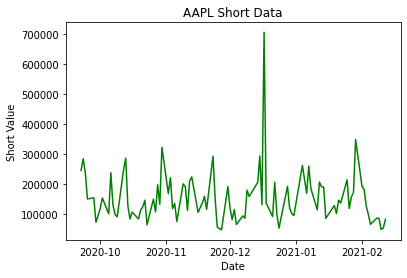

In [158]:
import matplotlib.pyplot as plt

plt.plot(DATES, BX_SHORT_VALS, color='g')
# plt.plot(DATES, popdsf, color='orange')
plt.xlabel('Date')
plt.ylabel('Short Value')
plt.title('AAPL Short Data')
plt.show()

In [159]:
ftp.cwd("../psx")
os.chdir('/content/PSX Data')
!pwd

/content/PSX Data


In [160]:
# https://stackoverflow.com/questions/11573817/how-to-download-a-file-via-ftp-with-python-ftplib
psx_filenames = ftp.nlst()
psx_filenames = psx_filenames[-102:-2] #Most recent 100 days (past 100 days)
print(psx_filenames)


['NPSXshvol20200922.txt', 'NPSXshvol20200923.txt', 'NPSXshvol20200924.txt', 'NPSXshvol20200925.txt', 'NPSXshvol20200928.txt', 'NPSXshvol20200929.txt', 'NPSXshvol20200930.txt', 'NPSXshvol20201001.txt', 'NPSXshvol20201002.txt', 'NPSXshvol20201005.txt', 'NPSXshvol20201006.txt', 'NPSXshvol20201007.txt', 'NPSXshvol20201008.txt', 'NPSXshvol20201009.txt', 'NPSXshvol20201012.txt', 'NPSXshvol20201013.txt', 'NPSXshvol20201014.txt', 'NPSXshvol20201015.txt', 'NPSXshvol20201016.txt', 'NPSXshvol20201019.txt', 'NPSXshvol20201020.txt', 'NPSXshvol20201021.txt', 'NPSXshvol20201022.txt', 'NPSXshvol20201023.txt', 'NPSXshvol20201026.txt', 'NPSXshvol20201027.txt', 'NPSXshvol20201028.txt', 'NPSXshvol20201029.txt', 'NPSXshvol20201030.txt', 'NPSXshvol20201102.txt', 'NPSXshvol20201103.txt', 'NPSXshvol20201104.txt', 'NPSXshvol20201105.txt', 'NPSXshvol20201106.txt', 'NPSXshvol20201109.txt', 'NPSXshvol20201110.txt', 'NPSXshvol20201111.txt', 'NPSXshvol20201112.txt', 'NPSXshvol20201113.txt', 'NPSXshvol20201116.txt',

In [161]:
for psxfile in psx_filenames:
  with open(psxfile, 'wb') as file:
    ftp.retrbinary('RETR %s' % psxfile, file.write)
    file.close()

In [162]:
import pandas as pd
from string import digits



################# EXTREMELY IMPORTANT CANCER ########################3
############## os.listdir is stupid and doesnt return files in the right order##############
############## YOU HAVE TO USE SORTED function around it for correct order ##################
# print(sorted(os.listdir(os.getcwd())))

#get current working directory
dateString = '';
allFiles = sorted(os.listdir(os.getcwd()))
print(len(allFiles))
for filename in allFiles:
   print(dateString)
   with open(os.path.join(os.getcwd(), filename), 'r') as file:
     lines = file.readlines()
     file.close() #free memory
     for line in lines:
       line = line.split('|')
       
       if len(line) > 1:
          if line[1] == STOCK and line[0] is not 'DATE':
            PSX_SHORT_VALS.append(int(line[2]))

            dateString = ''.join(c for c in filename if c in digits)

            if dateString[4] != 0:
              month = int(dateString[4:6])
            else:
              month = int(dateString[5])
            
            if dateString[6] != 0:
              day = int(dateString[-2:])
            else:
              day = int(dateString[7])

            PSX_DATES.append(datetime.date(int(dateString[:4]), month, day))


print(PSX_SHORT_VALS)

100

20200922
20200923
20200924
20200925
20200928
20200929
20200930
20201001
20201002
20201005
20201006
20201007
20201008
20201009
20201012
20201013
20201014
20201015
20201016
20201019
20201020
20201021
20201022
20201023
20201026
20201027
20201028
20201029
20201030
20201102
20201103
20201104
20201105
20201106
20201109
20201110
20201111
20201112
20201113
20201116
20201117
20201118
20201119
20201120
20201123
20201124
20201125
20201127
20201130
20201201
20201202
20201203
20201204
20201207
20201208
20201209
20201210
20201211
20201214
20201215
20201216
20201217
20201218
20201221
20201222
20201223
20201224
20201228
20201229
20201230
20201231
20210104
20210105
20210106
20210107
20210108
20210111
20210112
20210113
20210114
20210115
20210119
20210120
20210121
20210122
20210125
20210126
20210127
20210128
20210129
20210201
20210202
20210203
20210204
20210205
20210208
20210209
20210210
20210211
[317286, 412736, 335698, 484193, 370529, 353225, 725934, 742685, 1047774, 503746, 1110865, 577633, 49851

In [163]:
print(PSX_DATES)
print(PSX_SHORT_VALS)

[datetime.date(2020, 9, 22), datetime.date(2020, 9, 23), datetime.date(2020, 9, 24), datetime.date(2020, 9, 25), datetime.date(2020, 9, 28), datetime.date(2020, 9, 29), datetime.date(2020, 9, 30), datetime.date(2020, 10, 1), datetime.date(2020, 10, 2), datetime.date(2020, 10, 5), datetime.date(2020, 10, 6), datetime.date(2020, 10, 7), datetime.date(2020, 10, 8), datetime.date(2020, 10, 9), datetime.date(2020, 10, 12), datetime.date(2020, 10, 13), datetime.date(2020, 10, 14), datetime.date(2020, 10, 15), datetime.date(2020, 10, 16), datetime.date(2020, 10, 19), datetime.date(2020, 10, 20), datetime.date(2020, 10, 21), datetime.date(2020, 10, 22), datetime.date(2020, 10, 23), datetime.date(2020, 10, 26), datetime.date(2020, 10, 27), datetime.date(2020, 10, 28), datetime.date(2020, 10, 29), datetime.date(2020, 10, 30), datetime.date(2020, 11, 2), datetime.date(2020, 11, 3), datetime.date(2020, 11, 4), datetime.date(2020, 11, 5), datetime.date(2020, 11, 6), datetime.date(2020, 11, 9), date

In [164]:
# %cd /content
# %rm -rf 'PSX Data'

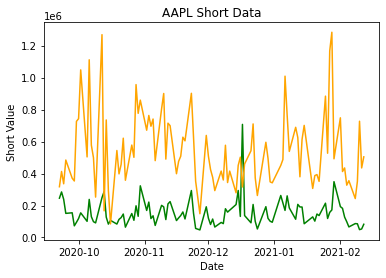

In [165]:
import matplotlib.pyplot as plt

plt.plot(DATES, BX_SHORT_VALS, color='g')
plt.plot(PSX_DATES, PSX_SHORT_VALS, color='orange')
# plt.plot(DATES, popdsf, color='orange')
plt.xlabel('Date')
plt.ylabel('Short Value')
plt.title('AAPL Short Data')
plt.show()